# Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP

# Load Data from text file

In [2]:
data = np.loadtxt('pca_data.txt', delimiter=' ')

# Print the data and its shape

In [3]:
print('-----------Data-----------')
print(data)

print('-----------Data Shape-----------')
print(data.shape)

-----------Data-----------
[[ 0.15577518  0.3815071  -0.27964889 ... -0.33626288  0.52214053
  -0.12844284]
 [-0.25157293 -0.62868778  0.23054575 ...  0.65877129 -0.47864564
  -0.06699679]
 [ 0.12406604  0.1624342  -0.09592387 ... -0.20754835  0.2407105
   0.02399169]
 ...
 [-0.07051366 -0.00992513 -0.12683092 ...  0.12660751  0.05864094
  -0.03109701]
 [-0.18501115 -0.72532163  0.3691466  ...  0.52773602 -0.67919702
   0.10335882]
 [ 0.17563677  0.0898811  -0.0886389  ... -0.2687618   0.18672659
   0.11369684]]
-----------Data Shape-----------
(1000, 500)


# Implementation of Principal Component Analysis (PCA) from scratch

In [4]:
class My_PCA:
    def __init__(self, num_components):
        self.num_components = num_components
        self.components = None
        self.mean = None
        self.explained_variance_share = None

    def fit(self, X):
        assert 0 < self.num_components <= X.shape[1], "Invalid number of components"
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # Covariance matrix
        cov = np.cov(X, rowvar=False)

        # Eigenvalues, Eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # Sort eigenvectors
        idxs = np.argsort(np.abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[:, idxs]

        # Store explained variance share
        self.explained_variance_share = eigenvalues

        # Store first n eigenvectors
        self.components = eigenvectors[:, 0:self.num_components]

    def transform(self, X):
        # Project data
        X = X - self.mean
        return np.dot(X, self.components)
    
    def inverse_transform(self, X):
        return np.dot(X, self.components.T) + self.mean
    
    def explained_variance(self):
        return self.explained_variance_share[:self.num_components]
    
    def explained_variance_ratio(self):
        return self.explained_variance() / np.sum(self.explained_variance_share)
    
    def cumulative_explained_variance_ratio(self):
        return np.cumsum(self.explained_variance_ratio())
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
    
    def fit_inverse_transform(self, X):
        self.fit(X)
        return self.inverse_transform(X)

In [5]:
pca = My_PCA(2)
X_projected = pca.fit_transform(data)

print('-----------My PCA-----------')
print('Components')
print(pca.components)
print('Mean')
print(pca.mean)
print('Projected Data')
print(X_projected)
print('Explained Variance')
print(pca.explained_variance())
print('Explained Variance Ratio')
print(pca.explained_variance_ratio())
print('Cumulative Explained Variance Ratio')
print(pca.cumulative_explained_variance_ratio())
print('Inverse Transform')
print(pca.inverse_transform(X_projected))


-----------My PCA-----------
Components
[[ 1.85519716e-02  4.21066493e-02]
 [ 6.94139522e-02 -5.44212480e-03]
 [-5.35748040e-02  9.06403565e-02]
 [-3.92593289e-03  4.76895925e-02]
 [ 2.55296800e-02 -6.93779607e-02]
 [ 1.94905375e-02 -4.69708097e-04]
 [ 3.38447484e-02  9.92562835e-02]
 [-5.22910818e-02 -3.46209745e-02]
 [-5.13696723e-02  2.47083387e-02]
 [-5.28164408e-02 -3.83317882e-03]
 [ 2.77429334e-03 -2.26232349e-02]
 [ 1.38445217e-01  2.13590259e-02]
 [-4.36803952e-02  5.72610599e-02]
 [ 1.00159556e-01 -1.39943981e-02]
 [-4.27814925e-02 -2.29117861e-02]
 [ 1.20297239e-01 -3.27743949e-02]
 [-7.10024165e-02  5.52192267e-02]
 [-1.67949580e-02 -3.22876086e-02]
 [ 1.11501911e-01 -6.12756749e-02]
 [-1.07716210e-02  5.39988457e-02]
 [ 4.30478578e-02 -2.03283884e-02]
 [-3.87264861e-02 -2.21225378e-02]
 [-8.96992396e-02  3.54837326e-02]
 [-4.43626524e-02 -3.89637575e-02]
 [-2.68970418e-02 -2.91136371e-02]
 [ 2.42344606e-02  1.56290455e-02]
 [-3.30240880e-02 -2.07372636e-02]
 [-3.07359552e-

# Necessary Plots

/home/sabah/miniconda3/envs/thesis/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


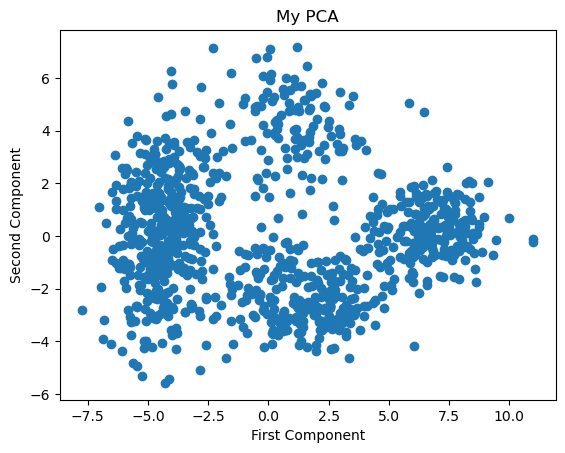

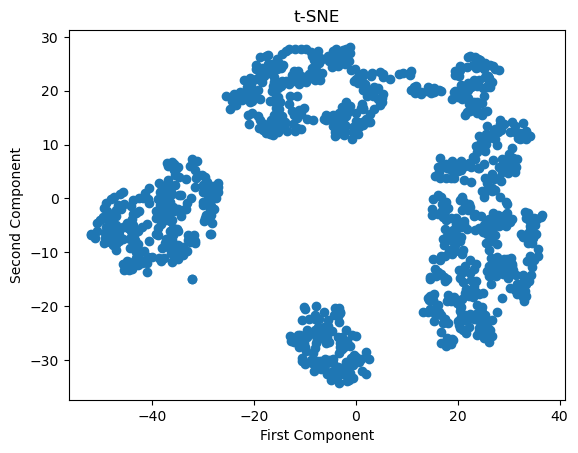

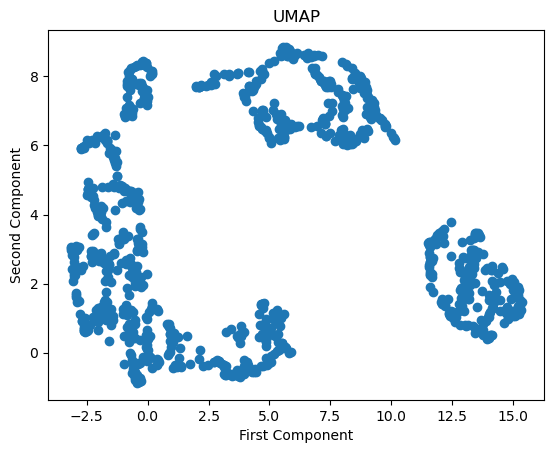

In [6]:
myPCA = My_PCA(2)
X_myPCA = myPCA.fit_transform(data)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(data)

umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(data)

plt.scatter(X_myPCA[:, 0], X_myPCA[:, 1])
plt.title('My PCA')
plt.xlabel('First Component')
plt.ylabel('Second Component')

plt.show()

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE')
plt.xlabel('First Component')
plt.ylabel('Second Component')

plt.show()

plt.scatter(X_umap[:, 0], X_umap[:, 1])
plt.title('UMAP')

plt.xlabel('First Component')
plt.ylabel('Second Component')

plt.show()